<a href="https://colab.research.google.com/github/GiuseppeContino/VP_project/blob/main/%5BVP%5DProject_image_text_snm_64x64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jul 12 08:18:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
! rm -rf sample_data

In [ ]:
import random
import numpy as np
import torch

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# set the paths

In [ ]:
base_path = '/content/drive/MyDrive/VP/birds/'

data_path = 'images.txt'

images_path = 'images/'

texts_path = 'text/'

generator_path = 'model/generator_T2I_snm_weights'
discriminator_path = 'model/discrtiminator_T2I_snm_weights'
text_encoder_path = 'model/text_encoder_T2I_snm_weights'
log_path = 'model/log_T2I_snm.txt'

In [ ]:
f = open(base_path + data_path, 'r')

num_lines = sum(1 for line in f)

num_lines

11788

In [ ]:
f = open(base_path + data_path, 'r')

elements = list()

for element in f:

    elements.append(element)

In [ ]:
elements[1].split(' ')[1][:-1]

'001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg'

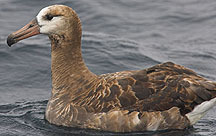

In [ ]:
from PIL import Image

IDX = 21

image_path = base_path + images_path + elements[IDX].split(' ')[1][:-1]

real_bird = Image.open(image_path)

real_bird

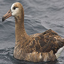

In [ ]:
real_bird = real_bird.resize((64, 64))
real_bird

In [ ]:
from torchvision import transforms

convert_tensor = transforms.ToTensor()
real_bird = convert_tensor(real_bird)

real_bird

tensor([[[0.5686, 0.5529, 0.5255,  ..., 0.5451, 0.5529, 0.5569],
         [0.5059, 0.5098, 0.5020,  ..., 0.5647, 0.5843, 0.6000],
         [0.4784, 0.5020, 0.5294,  ..., 0.6039, 0.5765, 0.5686],
         ...,
         [0.5176, 0.5216, 0.5059,  ..., 0.3569, 0.4902, 0.5216],
         [0.5020, 0.4745, 0.4471,  ..., 0.6353, 0.5725, 0.4980],
         [0.3882, 0.3725, 0.3529,  ..., 0.5412, 0.5137, 0.4588]],

        [[0.5725, 0.5569, 0.5255,  ..., 0.5412, 0.5490, 0.5529],
         [0.5098, 0.5137, 0.5020,  ..., 0.5608, 0.5804, 0.5961],
         [0.4824, 0.5059, 0.5294,  ..., 0.6000, 0.5725, 0.5647],
         ...,
         [0.5216, 0.5255, 0.5098,  ..., 0.3569, 0.4941, 0.5255],
         [0.5137, 0.4902, 0.4588,  ..., 0.6314, 0.5804, 0.5020],
         [0.4039, 0.3922, 0.3686,  ..., 0.5490, 0.5176, 0.4627]],

        [[0.5922, 0.5765, 0.5529,  ..., 0.5647, 0.5725, 0.5765],
         [0.5294, 0.5333, 0.5294,  ..., 0.5843, 0.6039, 0.6196],
         [0.5020, 0.5255, 0.5569,  ..., 0.6235, 0.5961, 0.

In [ ]:
real_bird.shape

torch.Size([3, 64, 64])

In [ ]:
import gensim.downloader as api
from sklearn.preprocessing import normalize

embedding_model = api.load('glove-wiki-gigaword-300')

embedding_size = embedding_model.vector_size
embedding_vocab = len(embedding_model)

[=================================================-] 99.2% 372.9/376.1MB downloaded


In [ ]:
embedding_model.vector_size

300

In [ ]:
len(embedding_model)

400000

In [ ]:
key = embedding_model.key_to_index['house']
key

166

In [ ]:
embedding_model[key]

array([-3.7070e-01, -8.1209e-02, -4.4626e-01,  9.7395e-02,  1.9829e-01,
       -4.1232e-02,  2.1189e-01,  2.2369e-01, -5.9915e-01, -1.3556e+00,
       -3.7264e-03, -5.5059e-01,  2.1565e-02,  1.0682e-02,  4.6047e-02,
        4.7083e-01, -1.9260e-01,  9.3603e-02,  1.9810e-01,  1.8292e-01,
        2.3985e-01,  4.4817e-01,  2.5241e-01,  3.1304e-01, -3.1769e-01,
        3.7594e-02, -8.7822e-02, -6.9569e-02, -1.9033e-02,  2.5181e-01,
        5.2750e-01,  1.0401e-01, -5.6956e-01,  6.8120e-01, -6.8936e-01,
        8.4081e-01,  4.1774e-02, -4.4636e-01, -3.0759e-01, -2.8145e-01,
        6.3517e-01,  5.0412e-01, -3.3981e-01,  6.9191e-01, -1.5074e-01,
        1.6806e-01, -3.4202e-01, -4.4845e-01,  5.9830e-02,  1.2643e-01,
       -2.3143e-01, -9.2232e-02, -9.0830e-02,  2.1642e-01,  6.2580e-01,
       -3.2599e-01, -5.2104e-01,  3.4727e-01, -8.4967e-02, -1.9764e-01,
        4.4523e-01, -4.4723e-01,  4.3726e-01,  2.6063e-01,  6.5426e-01,
       -1.4532e+00,  3.2055e-01, -3.7515e-01, -2.2897e-01, -7.00

In [ ]:
pad = np.zeros(embedding_size)
pad

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
unk = np.zeros(embedding_size)

for w in list(embedding_model.index_to_key):
    unk += embedding_model[w]

unk =  normalize(unk[:, np.newaxis], axis=0).ravel()
unk

array([ 4.49480217e-02, -4.05460040e-02, -2.30761798e-05,  6.62155298e-02,
       -5.43732447e-03, -4.37523657e-03,  3.91367323e-02, -4.94019419e-02,
       -2.19340215e-02,  2.97207486e-01, -5.53003189e-02,  1.68887384e-03,
        4.91018462e-02, -5.30326651e-02, -4.05599742e-02, -5.89194434e-02,
        4.25396457e-02, -1.30448642e-02,  1.19333940e-02,  2.74972272e-02,
        2.03047425e-02, -3.35112934e-02, -1.01514734e-01, -5.20303067e-02,
        7.99506489e-02, -8.63058549e-03, -8.16764175e-03,  1.37765462e-02,
        3.42548427e-02, -2.77670145e-02, -1.26689990e-02, -8.97992938e-02,
        4.66518600e-02, -5.89895105e-02,  2.22612408e-01, -1.48011798e-02,
       -3.54830984e-02, -6.15951627e-03,  3.01623600e-02,  1.75688004e-02,
        2.06346481e-02,  4.12819963e-02,  2.19822603e-02, -9.22170636e-02,
       -1.41438314e-02, -1.34036120e-02, -3.29270486e-02, -5.68287218e-02,
        3.91660289e-02, -3.55009806e-02, -8.95540777e-03,  4.10452548e-02,
        6.54657238e-03, -

In [ ]:
PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'

embedding_model.add_vectors(PAD_TOKEN, pad)
embedding_model.add_vectors(UNK_TOKEN, unk)

len(embedding_model)

400002

In [ ]:
embedding_model.key_to_index[PAD_TOKEN]

400000

In [ ]:
embedding_model.key_to_index[UNK_TOKEN]

400001

In [ ]:
# compose the txt file path using the image file path
text_path = base_path + texts_path + elements[IDX].split(' ')[1][:-4] + 'txt'

text_file = open(text_path, 'r')

captions = text_file.read()

print(captions)

a bird with a large, hooked bill, white superciliary and cheek patch, brown crown, and brown body.
the bird has brown and black coverts and white crown and cheek patch.
medium sized bird with a stout beak and brown and white feathers.
this bird has a brown mottled appearance with a long hooked bill.
a medium sized bird that has tones of brown and a medium sized bill
this brown bird has a pink and gray beak that slightly points downwards at the tip.
this bird has a long bill, while is body is covered in different shades of brown.
this bird has a long brown bill and is brown all over.
this bird has wings that are brown and has a long neck
this is a medium sized brown bird, with a white face, and a long bill.



In [ ]:
text_file = open(text_path, 'r')

captions = text_file.readline()

captions[:-1]

'a bird with a large, hooked bill, white superciliary and cheek patch, brown crown, and brown body.'

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
caption = captions[:-1].translate(str.maketrans('', '', string.punctuation))
caption

'a bird with a large hooked bill white superciliary and cheek patch brown crown and brown body'

In [ ]:
caption = caption.split(' ')
caption

['a',
 'bird',
 'with',
 'a',
 'large',
 'hooked',
 'bill',
 'white',
 'superciliary',
 'and',
 'cheek',
 'patch',
 'brown',
 'crown',
 'and',
 'brown',
 'body']

In [ ]:
def text_to_key(text: list, model) -> list:

    input_tensor = list()

    for element in text:

        if element.lower() in model.key_to_index:
            input_tensor.append(model.key_to_index[element.lower()])
        else:
            input_tensor.append(embedding_model.key_to_index[UNK_TOKEN])
            # raise RuntimeError('error in text_to_emb to element ', element)

    return input_tensor

keys = text_to_key(caption, embedding_model)
keys

[7,
 2632,
 17,
 7,
 426,
 12765,
 480,
 298,
 400001,
 5,
 14950,
 8911,
 1042,
 3120,
 5,
 1042,
 719]

In [ ]:
TEXT_MAX_LENGHT = 16

keys_paddes = keys[:TEXT_MAX_LENGHT] + [embedding_model.key_to_index[PAD_TOKEN]] * (TEXT_MAX_LENGHT - len(keys))
keys_paddes

[7,
 2632,
 17,
 7,
 426,
 12765,
 480,
 298,
 400001,
 5,
 14950,
 8911,
 1042,
 3120,
 5,
 1042]

In [ ]:
print(len(keys_paddes))

16


# Hyperparameters

In [ ]:
import torch

class HParams():

    train = True

    load_epochs = 0

    embedding_dim = len(embedding_model)
    embedding_vector_size = embedding_model.vector_size
    text_max_length = TEXT_MAX_LENGHT

    lstm_dim = 128

    epochs = 200
    batch_size = 128
    image_show_step = 50

    image_dim = 64

    noise_mean = 0.0
    noise_std = 0.2
    noise_dim = 512

    hidden_dim = 64

    learn_rate = 0.0002
    beta1 = 0.5

    device = 'cuda' if torch.cuda.is_available() else 'cpu'

params = HParams()

In [ ]:
params.device

'cuda'

# Dataset

In [ ]:
# from torch.utils.data import Dataset
# from tqdm.notebook import tqdm

# class DCGAN_dataset(Dataset):

#     # def __init__(self, images, captions, window_size: int, device = 'cpu'):
#     def __init__(self, data_path, device = 'cpu'):

#         self.data_path = data_path

#         self.data = self.create_dataset(self.data_path)


#     def create_dataset(self, data_path):

#         dataset = []

#         data  = open(data_path, 'r')

#         progress_bar = tqdm(total=num_lines)

#         for element in data:

#             progress_bar.update()

#             # open the image and resize it
#             image_path = images_path + element.split(' ')[1][:-1]

#             image = Image.open(image_path)

#             image = image.resize((params.image_dim, params.image_dim))

#             assert image.size == (params.image_dim, params.image_dim)

#             #open the captions
#             text_path = base_path + texts_path + element.split(' ')[1][:-4] + 'txt'

#             text_file = open(text_path, 'r')

#             # fill the dataset
#             dataset.append({'image' : convert_tensor(image), 'caption': text_file.read()})

#             image.close()
#             text_file.close()

#         progress_bar.close()

#         return dataset


#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):

#         if self.data is None:
#             raise RuntimeError('error in get item')

#         return self.data[idx]

#     def pop(self, idx):
#         self.data = self.data.pop(idx)

#     def get_image(self, idx):
#         return self.images[idx]

#     def get_caption(self, idx):
#         return self.captions[idx]

# dataset = DCGAN_dataset(base_path + data_path)

In [ ]:
# dataset[0]

In [ ]:
# dataset[5386]['image'].shape

In [ ]:
# len(dataset[0]['caption'])

In [ ]:
# for i, element in enumerate(dataset):
#     print(i)
#     assert element['image'].shape == dataset[0]['image'].shape

In [ ]:
# dataset.data.pop(447)
# dataset.data.pop(1399)
# dataset.data.pop(3614)
# dataset.data.pop(3615)
# dataset.data.pop(3775)
# dataset.data.pop(5023)
# dataset.data.pop(5386)
# dataset.data.pop(6313)

In [ ]:
# import torchvision
# import torchvision.transforms as T

# transform = T.ToPILImage()
# img = transform(dataset[0]['image'])
# img.show()

In [ ]:
# import pickle

# with open('my_dataset.pickle', 'wb') as output:
#     pickle.dump(dataset.data, output)

In [ ]:
# with open('/content/drive/MyDrive/VP/birds_dataset.pickle', 'wb') as output:
#     pickle.dump(dataset.data, output)

In [ ]:
import pickle

with open('/content/drive/MyDrive/VP/birds_dataset.pickle', 'rb') as data:
    dataset_pickle = pickle.load(data)


In [ ]:
# pop the empty images

dataset_pickle.pop(447)
dataset_pickle.pop(1399)
dataset_pickle.pop(3614)
dataset_pickle.pop(3615)
dataset_pickle.pop(3775)
dataset_pickle.pop(5023)
dataset_pickle.pop(5386)
dataset_pickle.pop(6313)

{'image': tensor([[[0.8431, 0.8471, 0.8392,  ..., 0.3176, 0.3176, 0.2863],
          [0.7843, 0.7882, 0.7882,  ..., 0.3020, 0.2941, 0.2510],
          [0.6863, 0.6863, 0.6980,  ..., 0.2667, 0.2549, 0.2235],
          ...,
          [0.3294, 0.5059, 0.7137,  ..., 0.8431, 0.7647, 0.8118],
          [0.5529, 0.6745, 0.6431,  ..., 0.8471, 0.8667, 0.7451],
          [0.7647, 0.7765, 0.6706,  ..., 0.7529, 0.8353, 0.7373]]]),
 'caption': 'a large black bird with a humped bill and a white patch on the nape.\na black crow-like bird with white nape and stubby beak.\nthis bird is black and white in color, with a strange beak and a black eye ring.\nall black bird with gigantic black bill\nthis bird is black in color with a black beak, and black eye rings.\nthis bird has wings that are black with long black legs\nthis is a completely black bird with a thick short beak that curves down.\nthis bird has wings that are black and has a white nape\nthis bird has a dark black breast and a downward pointed

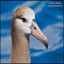

In [ ]:
import torchvision
import torchvision.transforms as T

transform = T.ToPILImage()
img = transform(dataset_pickle[0]['image'])
img.show()

In [ ]:
dataset_pickle[0]['image'].shape

torch.Size([3, 64, 64])

In [ ]:
dataset_pickle[0]['caption'].split('\n')[0]

'light tan colored bird with a white head and an orange beak.'

In [ ]:
len(dataset_pickle[0]['caption'].split('\n')[0])

60

In [ ]:
from torch.utils.data import Dataset
from tqdm.notebook import tqdm

class DCGAN_dataset(Dataset):

    # def __init__(self, images, captions, window_size: int, device = 'cpu'):
    def __init__(self, data_pickle, device = 'cpu'):

        self.data = data_pickle
        self.device = device

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        if self.data is None:
            raise RuntimeError('error in get item')

        return self.data[idx]

    def get_image(self, idx):
        return self.images[idx]

    def get_caption(self, idx):
        return self.captions[idx]

    def get_random_caption(self):
        rand_idx = random.randint(0, len(self.data) - 1)
        return self.data[rand_idx]['caption']

dataset = DCGAN_dataset(dataset_pickle, params.device)
# dataset = DCGAN_dataset(dataset, params.device)

In [ ]:
# custom weights initialization called on ``netG`` and ``netD``
# def weights_init(m):
#     classname = m.__class__.__name__
#     if classname.find('Conv') != -1:
#         nn.init.normal_(m.weight.data, 0.0, 0.02)
#     elif classname.find('BatchNorm') != -1:
#         nn.init.normal_(m.weight.data, 1.0, 0.02)
#         nn.init.constant_(m.bias.data, 0)

# Text encoder

In [ ]:
from torch import nn

class Text_encoder_model(nn.Module):

    def __init__(self):
        super(Text_encoder_model, self).__init__()

        self.embedding_layer = nn.Embedding.from_pretrained(torch.tensor(embedding_model.vectors), freeze = True)

        self.lstm = nn.LSTM(params.embedding_vector_size, params.lstm_dim)

    def forward(self, text):

        embedndded_text = self.embedding_layer(text)

        output, (h, c) = self.lstm(embedndded_text)

        output = output[:, -1].unsqueeze(-1).unsqueeze(-1)

        return output

text_encoder = Text_encoder_model().to(params.device)
text_encoder

Text_encoder_model(
  (embedding_layer): Embedding(400002, 300)
  (lstm): LSTM(300, 128)
)

In [ ]:
text = torch.tensor(keys_paddes, dtype=torch.int)
text.shape

torch.Size([16])

In [ ]:
if params.device == 'cuda':
    text = text.cuda()

encoded_text = text_encoder(text.unsqueeze(0))
encoded_text.shape

torch.Size([1, 128, 1, 1])

# Bird generator

In [ ]:
class Birds_generator_model(nn.Module):

    def __init__(self):
        super(Birds_generator_model, self).__init__()

        self.frist_conv_layer = nn.ConvTranspose2d(params.noise_dim + params.lstm_dim, params.hidden_dim * 8, 4, 1, 0, bias=False)
        self.first_norm_layer = nn.BatchNorm2d(params.hidden_dim * 8)

        self.second_conv_layer = nn.ConvTranspose2d(params.hidden_dim * 8, params.hidden_dim * 4, 4, 2, 1, bias=False)
        self.second_norm_layer = nn.BatchNorm2d(params.hidden_dim * 4)

        self.third_conv_layer = nn.ConvTranspose2d(params.hidden_dim * 4, params.hidden_dim * 2, 4, 2, 1, bias=False)
        self.third_norm_layer = nn.BatchNorm2d(params.hidden_dim * 2)

        self.forth_conv_layer = nn.ConvTranspose2d(params.hidden_dim * 2, params.hidden_dim, 4, 2, 1, bias=False)
        self.forth_norm_layer = nn.BatchNorm2d(params.hidden_dim)

        self.final_conv_layer = nn.ConvTranspose2d(params.hidden_dim, 3, 4, 2, 1, bias=False)

        self.main_activaction_function = nn.ReLU(True)
        self.final_activaction_function = nn.Tanh()


    def forward(self, text, noise):

        output = torch.cat((text, noise), 1)

        output = self.frist_conv_layer(output)
        output = self.first_norm_layer(output)
        output = self.main_activaction_function(output)

        output = self.second_conv_layer(output)
        output = self.second_norm_layer(output)
        output = self.main_activaction_function(output)

        output = self.third_conv_layer(output)
        output = self.third_norm_layer(output)
        output = self.main_activaction_function(output)

        output = self.forth_conv_layer(output)
        output = self.forth_norm_layer(output)
        output = self.main_activaction_function(output)

        output = self.final_conv_layer(output)
        output = self.final_activaction_function(output)

        return output

birds_generator = Birds_generator_model().to(params.device)
birds_generator
# birds_generator.apply(weights_init)

Birds_generator_model(
  (frist_conv_layer): ConvTranspose2d(640, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (first_norm_layer): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (second_conv_layer): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (second_norm_layer): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (third_conv_layer): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (third_norm_layer): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (forth_conv_layer): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (forth_norm_layer): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (final_conv_layer): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (main_activaction_function)

In [ ]:
noise = torch.randn(params.noise_dim, 1, 1).to(params.device)
noise.shape

torch.Size([512, 1, 1])

In [ ]:
fake_bird = birds_generator(encoded_text, noise.unsqueeze(0))
fake_bird.squeeze(0).shape

torch.Size([3, 64, 64])

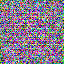

In [ ]:
fake_bird = fake_bird.squeeze().detach()
fake_bird = fake_bird.to('cpu')

transform = T.ToPILImage()
img = transform(fake_bird)
img.show()

# Bird discriminator

In [ ]:
class Birds_discriminator_model(nn.Module):

    def __init__(self):
        super(Birds_discriminator_model, self).__init__()

        self.frist_conv_layer = nn.utils.spectral_norm(nn.Conv2d(3, params.hidden_dim, 4, 2, 1, bias=False))

        self.second_conv_layer = nn.utils.spectral_norm(nn.Conv2d(params.hidden_dim, params.hidden_dim * 2, 4, 2, 1, bias=False))

        self.third_conv_layer = nn.utils.spectral_norm(nn.Conv2d(params.hidden_dim * 2, params.hidden_dim * 4, 4, 2, 1, bias=False))

        self.forth_conv_layer = nn.utils.spectral_norm(nn.Conv2d(params.hidden_dim * 4, params.hidden_dim * 8, 4, 2, 1, bias=False))

        self.fifth_conv_layer = nn.utils.spectral_norm(nn.Conv2d(params.hidden_dim * 8, params.hidden_dim * 16, 4, 2, 1, bias=False))

        self.final_conv_layer = nn.utils.spectral_norm(nn.Conv2d(params.hidden_dim * 16, params.hidden_dim * 16, 4, 2, 1, bias=False))

        self.mlp = nn.Linear(params.hidden_dim * 16 + params.lstm_dim, 1, bias=False)

        self.main_activaction_function = nn.LeakyReLU(0.2, inplace=True)
        self.final_activaction_function = nn.Sigmoid()


    def forward(self, text, image):

        output = self.frist_conv_layer(image)
        output = self.main_activaction_function(output)

        output = self.second_conv_layer(output)
        output = self.main_activaction_function(output)

        output = self.third_conv_layer(output)
        output = self.main_activaction_function(output)

        output = self.forth_conv_layer(output)
        output = self.main_activaction_function(output)

        output = self.fifth_conv_layer(output)
        output = self.main_activaction_function(output)

        output = self.final_conv_layer(output)

        flatten_layer = nn.Flatten()
        output = flatten_layer(output)

        output = torch.cat((text, output), 1)

        output = self.mlp(output)

        output = self.final_activaction_function(output)

        return output

birds_discriminator = Birds_discriminator_model().to(params.device)
# birds_discriminator.apply(weights_init)

In [ ]:
real_bird = real_bird.to(params.device)

In [ ]:
real_bird.shape

torch.Size([3, 64, 64])

In [ ]:
encoded_text.squeeze(-1).squeeze(-1).shape

torch.Size([1, 128])

In [ ]:
disctimination = birds_discriminator(encoded_text.squeeze(-1).squeeze(-1), real_bird.unsqueeze(0))
disctimination

tensor([[0.5009]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
disctimination.shape

torch.Size([1, 1])

In [ ]:
params.hidden_dim * 16 + 128

1152

In [ ]:
fake_bird = fake_bird.to(params.device)

In [ ]:
fake_bird.shape

torch.Size([3, 64, 64])

In [ ]:
disctimination = birds_discriminator(encoded_text.squeeze(-1).squeeze(-1), fake_bird.unsqueeze(0))
disctimination

tensor([[0.4994]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
disctimination.shape

torch.Size([1, 1])

In [ ]:
example_captions = []
example_keys_torches = torch.zeros((0, params.text_max_length), dtype=torch.int)

for idx in range(64):

    element = dataset.get_random_caption()

    captions = element.split('\n')
    captions = captions[:-1]

    captions_len = len(captions)

    rand_idx = random.randint(0, captions_len - 1)

    example_captions.append(captions[rand_idx])

    caption = captions[rand_idx].translate(str.maketrans('', '', string.punctuation))
    caption = caption.split(' ')

    keys = text_to_key(caption, embedding_model)

    keys_paddes = keys[:params.text_max_length] + [embedding_model.key_to_index[PAD_TOKEN]] * (params.text_max_length - len(keys))
    keys_torch = torch.tensor(keys_paddes, dtype=torch.int)

    example_keys_torches = torch.cat((example_keys_torches, keys_torch.unsqueeze(0)), 0)

example_keys_torches = example_keys_torches.to(params.device)
example_keys_torches.shape

torch.Size([64, 16])

In [ ]:
example_captions

['plump green and yellow bird, with a large belly and a beak with a flat orientation.',
 'this bird has a large orange bill,a white belly, a brown & black side, and a white supercilliary.',
 'this bird has a speckled belly and breast with a long needle like bill.',
 'a tall thin bird with white and brown breast and short black tarsas',
 'this bird has wings that are black and white and has a red belly',
 'this dark colored bird has red-orange eye, a short bill, and purple tints on its upper back.',
 'a small bird with brown nape and wing bars, and a short conical beak.',
 "this bird is black, with a very eye catching orange patch on it's chest",
 'this is a bird with a white breast and head and a brown spotted back and wing.',
 'this bird has a long pointed black bill, with a black back.',
 'this bird has wings that are black and has yellow eyes',
 'the head of the bird is large and black in color and the chest has a patch of red.',
 'the bird has a brown colored crown and streaks of b

# Trainer

In [ ]:
encoded_example_captions = text_encoder(example_keys_torches)
encoded_example_captions.shape

torch.Size([64, 128, 1, 1])

In [ ]:
noise_examples = torch.randn(64, params.noise_dim, 1, 1).to(params.device)
noise_examples = noise_examples.to(params.device)
noise_examples.shape

torch.Size([64, 512, 1, 1])

In [ ]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

class birds_GAN_trainer():

    def __init__(
        self,
        generator:nn.Module,
        discriminator:nn.Module,
        generator_loss_function,
        discriminator_loss_function,
        generator_optimizer,
        discriminator_optimizer,
        ):

        # models
        self.generator = generator
        self.discriminator = discriminator

        # loss functions
        self.generator_loss_function = generator_loss_function
        self.discriminator_loss_function = discriminator_loss_function

        # optimizers
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer

    def train(self, train_dataset: Dataset, epochs: int = 1):

        assert epochs >= 1 and isinstance(epochs, int)

        generator_list = list()
        discriminator_list = list()

        print('Training ...')

        for epoch in range(epochs):

            discriminator_train_loss = 0.0
            generator_train_loss = 0.0

            epoch_discriminator_loss = 0.0
            epoch_generator_loss = 0.0

            self.generator.train()
            self.discriminator.train()

            for sample in train_dataset:

                # prepare the network inputs
                real_birds = sample['image']
                birds_text = sample['caption']

                # DOTO 0 must be chosen random
                keys_torches = torch.zeros((0, params.text_max_length), dtype=torch.int)

                # from the whole captions of each image it's chosen one randomly
                for element in birds_text:

                    captions = element.split('\n')
                    captions = captions[:-1]

                    captions_len = len(captions)
                    rand_idx = random.randint(0, captions_len - 1)

                    caption = captions[rand_idx].translate(str.maketrans('', '', string.punctuation))
                    caption = caption.split(' ')

                    keys = text_to_key(caption, embedding_model)

                    keys_paddes = keys[:params.text_max_length] + [embedding_model.key_to_index[PAD_TOKEN]] * (params.text_max_length - len(keys))
                    keys_torch = torch.tensor(keys_paddes, dtype=torch.int)

                    keys_torches = torch.cat((keys_torches, keys_torch.unsqueeze(0)), 0)

                if params.device == 'cuda':

                    keys_torches = keys_torches.cuda()

                # set to zero the discriminator gradient
                self.discriminator_optimizer.zero_grad()

                encoded_keys_torches = text_encoder(keys_torches)

                # send the real image to the device
                real_birds = real_birds.to(params.device)

                # discriminate the real birds
                real_discrimination_birds = self.discriminator(encoded_keys_torches.squeeze(-1).squeeze(-1), real_birds)

                # compute the loss for real birds
                real_loss = self.discriminator_loss_function(real_discrimination_birds, torch.ones_like(real_discrimination_birds))

                # compute the back step for real birds
                # real_loss.backward()

                # create the noise
                noise = torch.randn(encoded_keys_torches.shape[0], params.noise_dim, 1, 1).to(params.device)
                noise = noise.to(params.device)

                # generate the fake bird
                fake_birds = self.generator(encoded_keys_torches, noise)

                # discriminate the fake birds
                fake_discrimination_birds = self.discriminator(encoded_keys_torches.squeeze(-1).squeeze(-1), fake_birds)

                # compute the loss for fake birds
                fake_loss = self.discriminator_loss_function(fake_discrimination_birds, torch.zeros_like(fake_discrimination_birds))

                # fake_loss.backward(retain_graph=True)

                # compute the total loss
                discriminator_loss = real_loss + fake_loss

                discriminator_list.append(float(discriminator_loss))

                # compute the back step for the discriminator
                discriminator_loss.backward(retain_graph=True)

                # otimize the network
                self.discriminator_optimizer.step()

                # set to zero the generator gradient
                self.generator_optimizer.zero_grad()

                fake_discrimination_birds = self.discriminator(encoded_keys_torches.squeeze(-1).squeeze(-1), fake_birds)

                generator_loss = self.generator_loss_function(fake_discrimination_birds, torch.ones_like(fake_discrimination_birds))

                generator_list.append(float(generator_loss))

                # compute the back step
                generator_loss.backward()

                # otimize the network
                self.generator_optimizer.step()

                # attach new losses for the history
                epoch_discriminator_loss += discriminator_loss.tolist()
                epoch_generator_loss += generator_loss.tolist()

            avg_discriminator_epoch_loss = epoch_discriminator_loss / len(train_dataset)
            discriminator_train_loss += avg_discriminator_epoch_loss

            avg_generator_epoch_loss = epoch_generator_loss / len(train_dataset)
            generator_train_loss += avg_generator_epoch_loss

            if epoch % params.image_show_step  == 0:

                print('Epoch {:03d}'.format(epoch))
                print('generator loss', avg_generator_epoch_loss)
                print('discriminator loss', avg_discriminator_epoch_loss)

                bird_image = birds_generator(encoded_example_captions, noise_examples)

                fig = plt.figure(figsize=(8,8))
                plt.axis('off')
                plt.title('Fake birds of epoch ' + str(params.load_epochs + epoch))
                plt.imshow(np.transpose(vutils.make_grid(bird_image, padding=2, normalize=True).cpu(), (1, 2, 0)));

                if epoch != 0:
                    torch.save(birds_generator.state_dict(), base_path + generator_path)
                    torch.save(birds_discriminator.state_dict(), base_path + discriminator_path)
                    torch.save(text_encoder.state_dict(), base_path + text_encoder_path)

                    with open(base_path + log_path, 'w') as f:
                        f.write(str(params.epochs + params.load_epochs))

                    print('saved')

        print('Epoch {:03d}'.format(epoch))
        print('generator loss', avg_generator_epoch_loss)
        print('discriminator loss', avg_discriminator_epoch_loss)

        print('... Done!')

        bird_image = birds_generator(encoded_example_captions, noise_examples)

        fig = plt.figure(figsize=(8,8))
        plt.axis('off')
        plt.title('Fake birds of epoch ' + str(params.load_epochs + epoch))
        plt.imshow(np.transpose(vutils.make_grid(bird_image, padding=2, normalize=True).cpu(), (1, 2, 0)));

        avg_discriminator_epoch_loss = discriminator_train_loss / epochs
        avg_generator_epoch_loss = generator_train_loss / epochs

        return avg_discriminator_epoch_loss, avg_generator_epoch_loss, discriminator_list, generator_list

In [ ]:
from torch.utils.data import DataLoader
import torch.optim as optim

# train_dataset = DataLoader(dataset[:params.batch_size], batch_size=params.batch_size, shuffle=True)
train_dataset = DataLoader(dataset, batch_size=params.batch_size, shuffle=True)

birds_generator.to(params.device)

Birds_generator_model(
  (frist_conv_layer): ConvTranspose2d(640, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (first_norm_layer): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (second_conv_layer): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (second_norm_layer): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (third_conv_layer): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (third_norm_layer): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (forth_conv_layer): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (forth_norm_layer): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (final_conv_layer): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (main_activaction_function)

In [ ]:
birds_discriminator.to(params.device)

Birds_discriminator_model(
  (frist_conv_layer): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (second_conv_layer): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (third_conv_layer): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (forth_conv_layer): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (fifth_conv_layer): Conv2d(512, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (final_conv_layer): Conv2d(1024, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (mlp): Linear(in_features=1152, out_features=1, bias=False)
  (main_activaction_function): LeakyReLU(negative_slope=0.2, inplace=True)
  (final_activaction_function): Sigmoid()
)

In [ ]:
from os.path import exists

generator_file = exists(base_path + generator_path)
discrtiminator_file = exists(base_path + discriminator_path)
log_file = exists(base_path + log_path)

if generator_file and discrtiminator_file and log_file:

    with open(base_path + log_path, 'r') as log_file:

        read_epochs = log_file.readline()

        print('reload model trainided for ' + str(read_epochs) + ' epochs')
        params.load_epochs = int(read_epochs)

    if params.device == 'cuda':
        birds_generator.load_state_dict(torch.load(base_path + generator_path))
        birds_discriminator.load_state_dict(torch.load(base_path + discriminator_path))
        print('cuda loaded')
    else:
        birds_generator.load_state_dict(torch.load(base_path + generator_path, map_location=torch.device('cpu')))
        birds_discriminator.load_state_dict(torch.load(base_path + discriminator_path, map_location=torch.device('cpu')))
        print('cpu loaded')

In [ ]:
trainer = birds_GAN_trainer(
    generator = birds_generator,
    discriminator = birds_discriminator,
    generator_loss_function = nn.BCELoss(),
    discriminator_loss_function = nn.BCELoss(),
    generator_optimizer = optim.Adam(birds_generator.parameters(), lr = params.learn_rate, betas = (params.beta1, 0.999)),
    discriminator_optimizer = optim.Adam(birds_discriminator.parameters(), lr = params.learn_rate, betas = (params.beta1, 0.999))
)

In [ ]:
from os.path import exists

generator_file = exists(base_path + generator_path)
discrtiminator_file = exists(base_path + discriminator_path)
log_file = exists(base_path + log_path)

if generator_file and discrtiminator_file and log_file:

    with open(base_path + log_path, 'r') as log_file:

        read_epochs = log_file.readline()

        print('reload model trainided for ' + str(read_epochs) + ' epochs')
        params.load_epochs = int(read_epochs)

    if params.device == 'cuda':
        birds_generator.load_state_dict(torch.load(base_path + generator_path))
        birds_discriminator.load_state_dict(torch.load(base_path + discriminator_path))
        text_encoder.load_state_dict(torch.load(base_path + text_encoder_path))
        print('cuda loaded')
    else:
        birds_generator.load_state_dict(torch.load(base_path + generator_path, map_location=torch.device('cpu')))
        birds_discriminator.load_state_dict(torch.load(base_path + discriminator_path, map_location=torch.device('cpu')))
        text_encoder.load_state_dict(torch.load(base_path + text_encoder_path, map_location=torch.device('cpu')))
        print('cpu loaded')

Training ...
Epoch 000
generator loss 3.4274979176059848
discriminator loss 0.7442220086632396
Epoch 050
generator loss 1.2821055311028675
discriminator loss 1.0921674921948423
saved
Epoch 100
generator loss 1.901354144978267
discriminator loss 0.7091760923785548
saved
Epoch 150
generator loss 1.9265655394523375
discriminator loss 0.7497958515280037
saved
Epoch 199
generator loss 2.133589804813426
discriminator loss 0.632206698899628
... Done!
average discriminator loss: 0.00316103349449814
average generator loss: 0.01066794902406713
time taken to run:  2 h  31 m  5 s


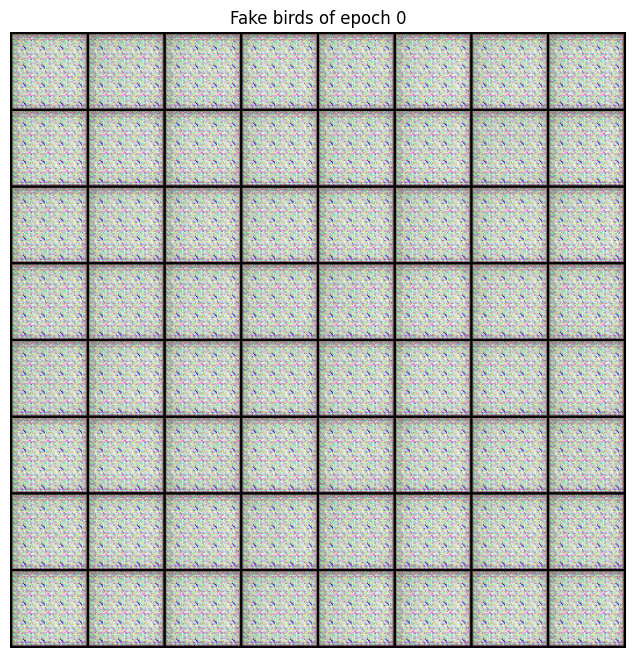

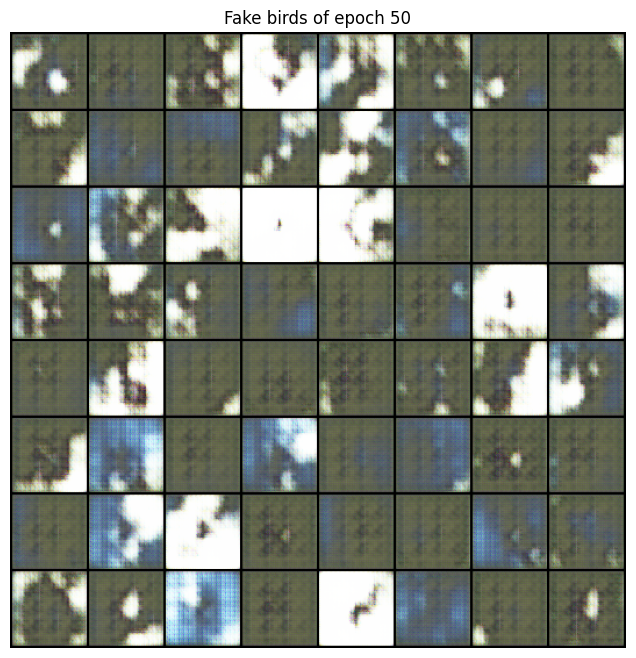

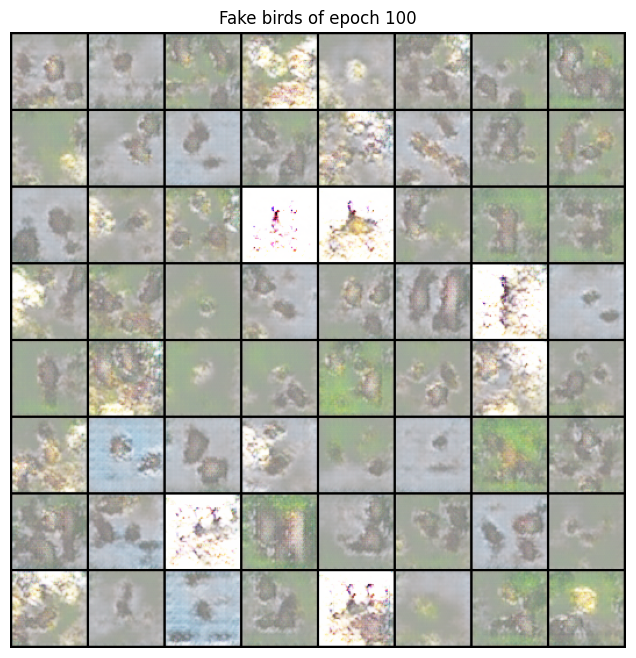

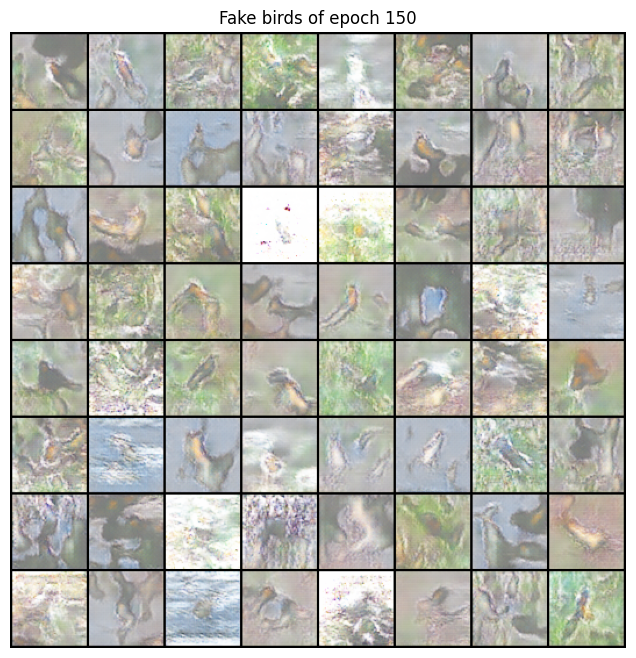

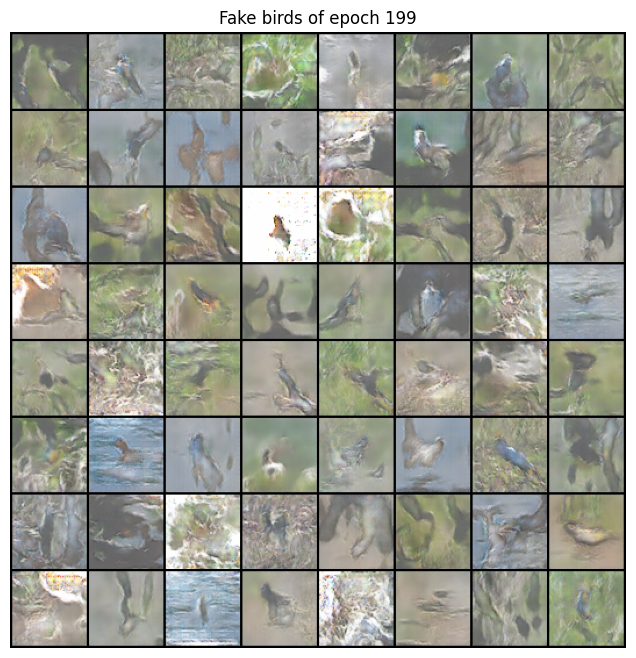

In [ ]:
import time

timer_1 = time.perf_counter()

average_discriminator_loss, average_generator_loss, discriminator_list, generator_list = trainer.train(train_dataset, params.epochs)

timer_2 = time.perf_counter()

print('average discriminator loss:', average_discriminator_loss)
print('average generator loss:', average_generator_loss)

print('time taken to run: ', int((timer_2 - timer_1) / 3600), 'h ', int((timer_2 - timer_1) / 60) % 60, 'm ', int(timer_2 - timer_1) % 60, 's')

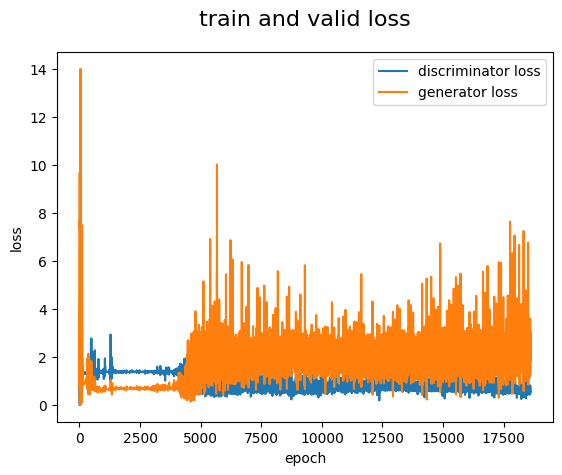

In [ ]:
plt.plot(range(len(discriminator_list)), discriminator_list, label = 'discriminator loss')
plt.plot(range(len(generator_list)), generator_list, label = 'generator loss')

plt.xlabel('epoch')
plt.ylabel('loss')

plt.title('train and valid loss', fontsize=16, y=1.05)
plt.legend()
plt.show()

In [ ]:
if params.train:
    torch.save(birds_generator.state_dict(), base_path + generator_path)
    torch.save(birds_discriminator.state_dict(), base_path + discriminator_path)
    torch.save(text_encoder.state_dict(), base_path + text_encoder_path)

    with open(base_path + log_path, 'w') as f:
        f.write(str(params.epochs + params.load_epochs))

    print('saved')

saved


# Show result

In [ ]:
keys_torches = torch.zeros((0, params.text_max_length), dtype=torch.int)
final_caption = []

for element in example_captions:

    caption = element.translate(str.maketrans('', '', string.punctuation))

    final_caption.append(caption)


    caption = caption.split(' ')

    keys = text_to_key(caption, embedding_model)

    keys_paddes = keys[:params.text_max_length] + [embedding_model.key_to_index[PAD_TOKEN]] * (params.text_max_length - len(keys))
    keys_torch = torch.tensor(keys_paddes, dtype=torch.int)

    keys_torches = torch.cat((keys_torches, keys_torch.unsqueeze(0)), 0)

keys_torches = keys_torches.to(params.device)
encoded_keys_torches = text_encoder(keys_torches)

noise = torch.randn(64, params.noise_dim, 1, 1).to(params.device)
noise = noise.to(params.device)

bird_image = birds_generator(encoded_keys_torches, noise)
bird_image.shape

torch.Size([64, 3, 64, 64])

In [ ]:
bird_image[0].unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
keys_torches.shape

torch.Size([64, 16])

In [ ]:
real_bird.shape

torch.Size([3, 64, 64])

In [ ]:
final_caption

['plump green and yellow bird with a large belly and a beak with a flat orientation',
 'this bird has a large orange billa white belly a brown  black side and a white supercilliary',
 'this bird has a speckled belly and breast with a long needle like bill',
 'a tall thin bird with white and brown breast and short black tarsas',
 'this bird has wings that are black and white and has a red belly',
 'this dark colored bird has redorange eye a short bill and purple tints on its upper back',
 'a small bird with brown nape and wing bars and a short conical beak',
 'this bird is black with a very eye catching orange patch on its chest',
 'this is a bird with a white breast and head and a brown spotted back and wing',
 'this bird has a long pointed black bill with a black back',
 'this bird has wings that are black and has yellow eyes',
 'the head of the bird is large and black in color and the chest has a patch of red',
 'the bird has a brown colored crown and streaks of brown on its coverts 

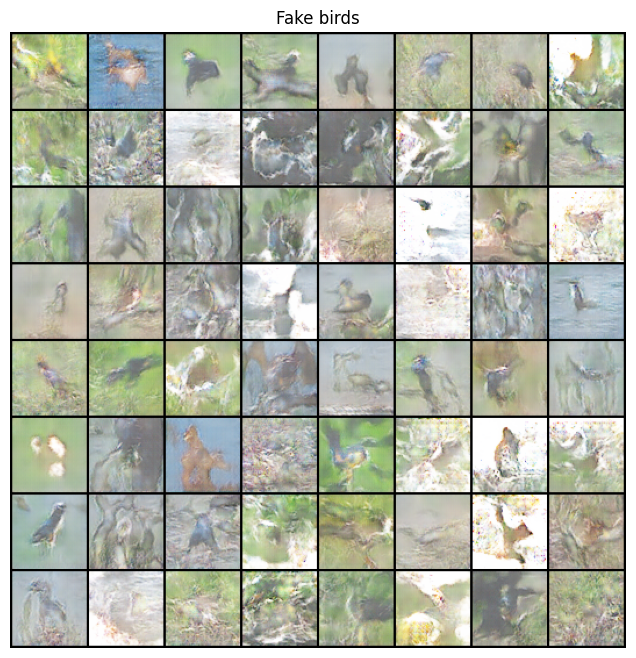

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.axis('off')
plt.title('Fake birds')
plt.imshow(np.transpose(vutils.make_grid(bird_image, padding=2, normalize=True).cpu(),(1,2,0)));

show only one image and then show it in a larger size (64, 64) -> (128, 128)

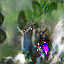

In [ ]:
from PIL import Image

# define a transform to convert a tensor to PIL image
transform = transforms.ToPILImage()

# convert the tensor to PIL image using above transform
img = transform(bird_image[19])

# display the PIL image
img.show()

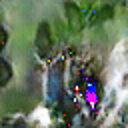

In [ ]:
img = img.resize((128, 128))

# display the PIL image
img.show()